In [1]:
from scipy.special import beta, binom
import numpy as np


def partitions(n, I=1):
    yield (n,)
    for i in range(I, n//2 + 1):
        for p in partitions(n-i, i):
            yield p + (i,)
            
def P(n): return len(list(partitions(n)))

def parts(n):
    """Given an integer, return a matrix whose columns enumerate various partitions. 
       See partitions::parts(...) R function  
    """
    ps = list(partitions(n))
    ps = sorted(ps, reverse=True)
    n_parts = len(ps)
    x = np.zeros(shape=(n_parts, n))
    for i,j in enumerate(ps):
        for k in range(len(j)):
            x[i][k] = j[k]
    return x.T


def RateMatandStateSpace(n, alpha):
    dim = P(n)
    Rmatrix = np.zeros(shape=(dim,n))
    x = parts(n)
    for i in range(1,dim+1):
        y = x[:,-i]
        for j in range(1,n+1):
            Rmatrix[i-1, j-1] = len(np.where(j==y)[0])
    Rmatrix = np.array(sorted(Rmatrix, key=lambda a_entry: a_entry[0], reverse=True))
    Rate = np.zeros(shape=(dim,dim))
    for i in range(1, dim):
        for j in range(i):
            c = Rmatrix[i,:] - Rmatrix[j,:]
            check1 = c@np.arange(1,n+1)
            w1 = c>0
            sum2 = c@w1
            check2 = sum2
            w2 = c<0
            cneg = -c * w2
            if check1 == 0 and check2 == 1:
                provrate = beta(sum(cneg) - alpha, sum(Rmatrix[j]) - sum(cneg) + alpha) / beta(alpha, 2-alpha)
                for k in range(0,n):
                    provrate = provrate * binom(Rmatrix[j,k], cneg[k])
                Rate[j,i] = provrate
    for i in range(dim):
        Rate[i,i] = -sum(Rate[i])
    return {'RateMat':Rate, 'StateSpace':Rmatrix}
    
    
    
def SiteFrequencySpectrumBetaCoalescent(n, alpha, mutrat = 2):
    dim = P(n)
    RmSs = RateMatandStateSpace(n, alpha)
    Rmat = RmSs['StateSpace'][0:dim-1,0:n-1] 
    T = RmSs['RateMat'][0:(dim-1), 0:(dim-1)]
    invRate = np.linalg.inv(-T)
    m1 = np.ones(n-1)
    id = np.diag(np.ones(dim-1))
    for i in range(n-1):
        m1[i] = id[0] @ invRate @ Rmat[:,i]
    m1 = mutrat / 2 * m1
    return m1


In [7]:
n= 25
alpha = 1.25
mutation_rate = 2

sfs25_125 = SiteFrequencySpectrumBetaCoalescent(n, alpha, mutation_rate)

In [5]:
import matplotlib.pyplot as plt

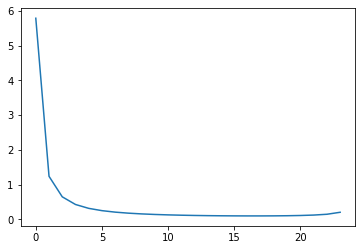

In [8]:
plt.plot(sfs25_125)